# MTA Analysis Project

### EDA
- Done by: Sara AlAbdulsalam
- SDAIA ACADIMY


#### Aquire Data


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')  

In [2]:
#Aquire data for the first five months on 2021
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210102, 210109, 210116, 210123, 210130, 210206, 210213, 210220, 210227, 210306, 210313, 210320, 210327, 210403, 210410, 210417, 210424, 210501, 210508, 210515, 210522, 210529]

turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689


In [4]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [5]:
#Remove extra white space from the column names
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
#Add a DATE and TIME column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [7]:
#Add a column that identfy turnstiles which is a combo of C/A, UNIT, SCP, and STATION  
turnstiles_df['TURNSTILE'] = turnstiles_df['C/A'] + '-' + turnstiles_df['UNIT'] + '-' + turnstiles_df['SCP']+ '-' + turnstiles_df['STATION']

In [8]:
# Sort data TURNSTILE and DATE_TIME and Get rid of the duplicate entry
turnstiles_df.sort_values(["TURNSTILE", "DATE_TIME"], inplace=True)
turnstiles_df.reset_index(drop = True,  inplace=True)
turnstiles_df.drop_duplicates(subset=["TURNSTILE", "DATE_TIME"], inplace=True)

In [9]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["TURNSTILE", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,TURNSTILE,DATE_TIME,ENTRIES
0,A002-R051-02-00-00-59 ST,2020-12-26 03:00:00,1
3068358,R138-R293-00-05-00-34 ST-PENN STA,2021-02-03 09:00:00,1
3068364,R138-R293-00-05-00-34 ST-PENN STA,2021-02-04 09:00:00,1
3068363,R138-R293-00-05-00-34 ST-PENN STA,2021-02-04 05:00:00,1
3068362,R138-R293-00-05-00-34 ST-PENN STA,2021-02-04 01:00:00,1
3068361,R138-R293-00-05-00-34 ST-PENN STA,2021-02-03 21:00:00,1
3068360,R138-R293-00-05-00-34 ST-PENN STA,2021-02-03 17:00:00,1
3068359,R138-R293-00-05-00-34 ST-PENN STA,2021-02-03 13:00:00,1
3068357,R138-R293-00-05-00-34 ST-PENN STA,2021-02-03 05:00:00,1
3068366,R138-R293-00-05-00-34 ST-PENN STA,2021-02-04 17:00:00,1


In [10]:
#groub by TURNSTILE
turnstile_grouped = turnstiles_df.groupby(['TURNSTILE'])

In [11]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,2020-12-26 03:00:00,A002-R051-02-00-00-59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002-R051-02-00-00-59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002-R051-02-00-00-59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002-R051-02-00-00-59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002-R051-02-00-00-59 ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602663,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,08:20:35,REGULAR,5554,577,2021-05-28 08:20:35,TRAM2-R469-00-05-01-RIT-ROOSEVELT
4602664,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,5554,577,2021-05-28 09:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT
4602665,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,5554,577,2021-05-28 13:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT
4602666,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,5554,577,2021-05-28 17:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT


In [12]:
#Add two columns for the exact number of ENTRIES and EXITS
turnstiles_df['ENTRIES_NUM'] = turnstile_grouped['ENTRIES'].transform(pd.Series.diff)
turnstiles_df['EXITS_NUM'] = turnstile_grouped['EXITS'].transform(pd.Series.diff)

In [13]:
turnstiles_df.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE,ENTRIES_NUM,EXITS_NUM
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,2020-12-26 03:00:00,A002-R051-02-00-00-59 ST,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002-R051-02-00-00-59 ST,2.0,12.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002-R051-02-00-00-59 ST,20.0,55.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002-R051-02-00-00-59 ST,79.0,31.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002-R051-02-00-00-59 ST,157.0,22.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,2020-12-26 23:00:00,A002-R051-02-00-00-59 ST,85.0,15.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,03:00:00,REGULAR,7508858,2557705,2020-12-27 03:00:00,A002-R051-02-00-00-59 ST,6.0,1.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,07:00:00,REGULAR,7508862,2557711,2020-12-27 07:00:00,A002-R051-02-00-00-59 ST,4.0,6.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,11:00:00,REGULAR,7508885,2557743,2020-12-27 11:00:00,A002-R051-02-00-00-59 ST,23.0,32.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,15:00:00,REGULAR,7508955,2557778,2020-12-27 15:00:00,A002-R051-02-00-00-59 ST,70.0,35.0


In [14]:
#drop the null values
turnstiles_df.dropna(subset=["ENTRIES_NUM","EXITS_NUM"], axis=0, inplace = True)

In [15]:
#Remove any rows of negative ENTRIES and EXITS
turnstiles_df=turnstiles_df[(turnstiles_df.ENTRIES_NUM>=0) & (turnstiles_df.EXITS_NUM>=0)]

In [16]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE,ENTRIES_NUM,EXITS_NUM
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002-R051-02-00-00-59 ST,2.0,12.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002-R051-02-00-00-59 ST,20.0,55.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002-R051-02-00-00-59 ST,79.0,31.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002-R051-02-00-00-59 ST,157.0,22.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,2020-12-26 23:00:00,A002-R051-02-00-00-59 ST,85.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602663,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,08:20:35,REGULAR,5554,577,2021-05-28 08:20:35,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0
4602664,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,5554,577,2021-05-28 09:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0
4602665,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,5554,577,2021-05-28 13:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0
4602666,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,5554,577,2021-05-28 17:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0


In [17]:
#Add a column for the total traffic (ENTRIES_NUM + EXITS_NUM) and name it busy 
turnstiles_df['Congestion'] = turnstiles_df['ENTRIES_NUM'].values + turnstiles_df['EXITS_NUM'].values

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE,ENTRIES_NUM,EXITS_NUM,Congestion
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002-R051-02-00-00-59 ST,2.0,12.0,14.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002-R051-02-00-00-59 ST,20.0,55.0,75.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002-R051-02-00-00-59 ST,79.0,31.0,110.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002-R051-02-00-00-59 ST,157.0,22.0,179.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,2020-12-26 23:00:00,A002-R051-02-00-00-59 ST,85.0,15.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602663,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,08:20:35,REGULAR,5554,577,2021-05-28 08:20:35,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0
4602664,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,5554,577,2021-05-28 09:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0
4602665,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,5554,577,2021-05-28 13:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0
4602666,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,5554,577,2021-05-28 17:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0


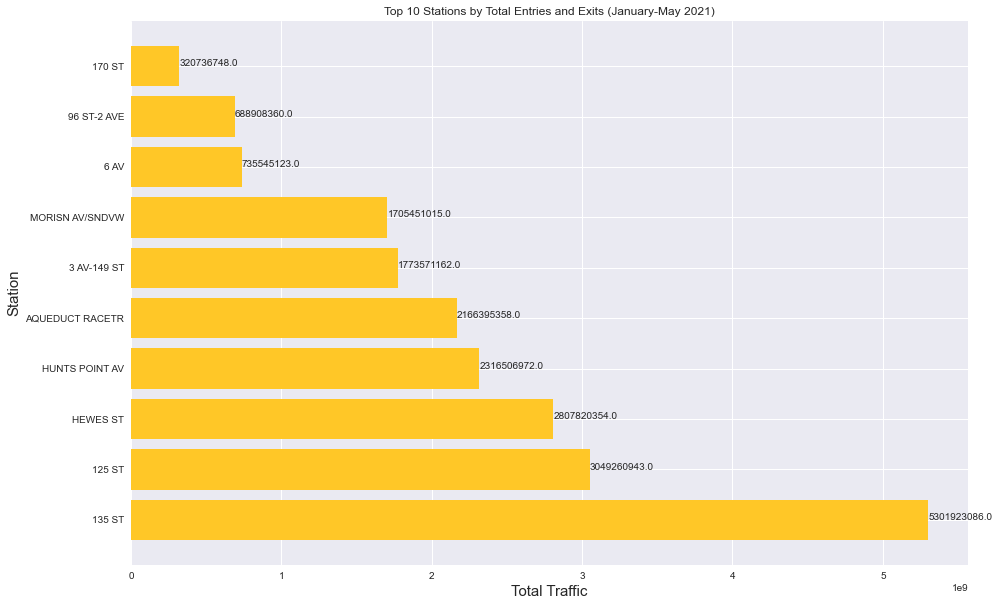

In [30]:
#get the top 10 station of total traffic
top_10_STATIONs =turnstiles_df.groupby(['STATION']).agg({'Congestion': sum}).sort_values(by = 'Congestion', ascending = False).reset_index().head(10)

#plot them aginst their busy (total traffic) values 
plt.figure(figsize=(15,10))
plt.title('Top 10 Stations by Total Entries and Exits (January-May 2021)') 
plt.xlabel('Total Traffic', fontsize= 15,family='sans-serif')
plt.ylabel('Station', fontsize= 15,family='sans-serif');
plt.barh(top_10_STATIONs['STATION'],top_10_STATIONs['Congestion'],color ='#FFC727')

#show the value for each bar
for index, value in enumerate(top_10_STATIONs['Congestion']):
    plt.text(value,index,str(value))
    
plt.show()

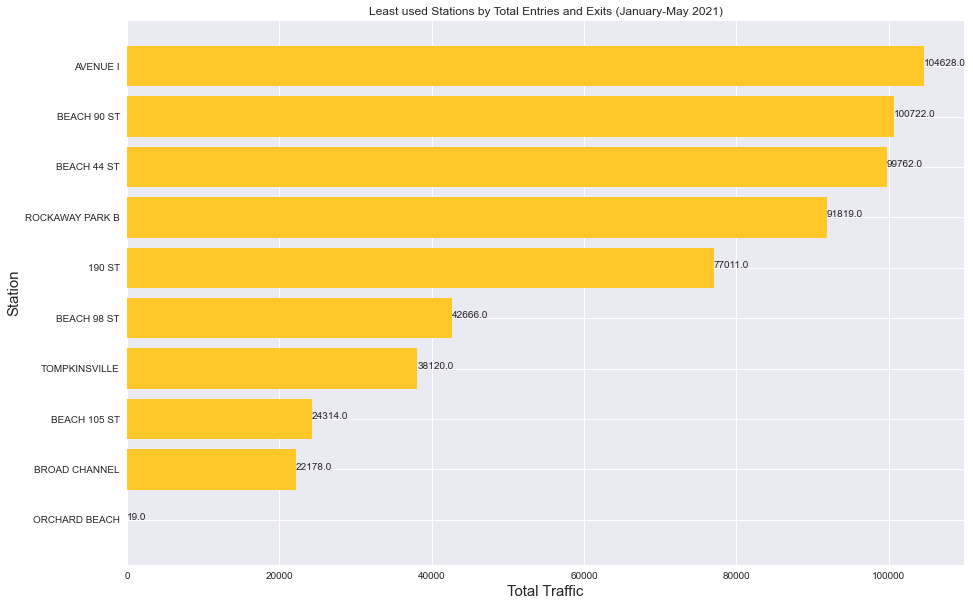

In [31]:
#get the Least used 10 station of total traffic
Last_10_STATIONs =turnstiles_df.groupby(['STATION']).agg({'Congestion': sum}).sort_values(by = 'Congestion', ascending = True).reset_index().head(10)

#plot them aginst their busy (total traffic) values 
plt.figure(figsize=(15,10))
plt.title('Least used Stations by Total Entries and Exits (January-May 2021)') 
plt.xlabel('Total Traffic', fontsize= 15,family='sans-serif')
plt.ylabel('Station', fontsize= 15,family='sans-serif');
plt.barh(Last_10_STATIONs['STATION'],Last_10_STATIONs['Congestion'],color ='#FFC727')

#show the value for each bar
for index, value in enumerate(Last_10_STATIONs['Congestion']):
    plt.text(value,index,str(value))
    
plt.show()

In [163]:
#Get a dataframe of Dates and total traffic grouped by Date to plot it
turnstiles_df_busy = turnstiles_df[['DATE', 'Congestion']].groupby(['DATE']).sum().reset_index()
turnstiles_df_busy['DATE'] = pd.to_datetime(turnstiles_df_busy['DATE'])

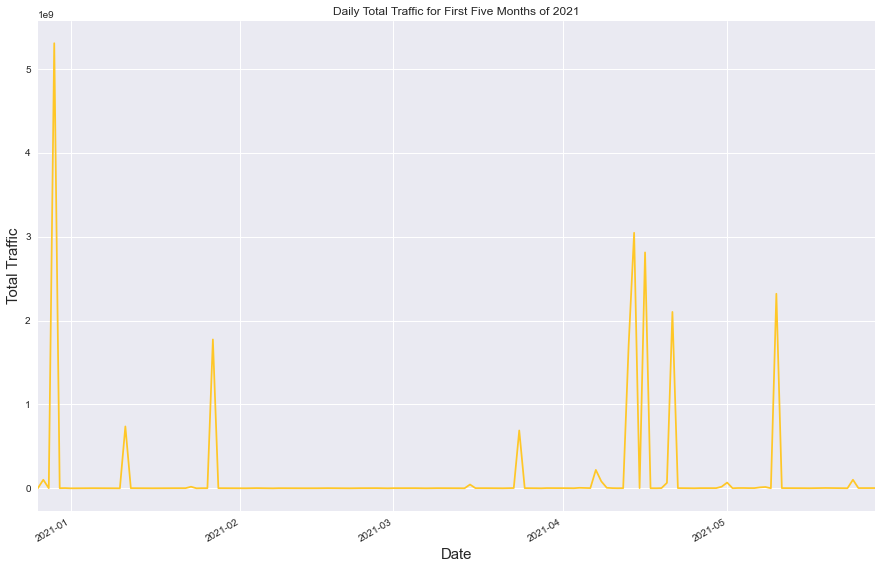

In [164]:
#plot the new data frame 
plt.figure(figsize=(15,10))
turnstiles_df_busy.set_index('DATE')['Congestion'].plot(color = '#FFC727')
plt.title('Daily Total Traffic for First Five Months of 2021') 
plt.xlabel('Date', fontsize= 15,family='sans-serif')
plt.ylabel('Total Traffic', fontsize= 15,family='sans-serif');
plt.show()
#Most traffic was at the beggining of the year

In [23]:
#Add a column for the Date weekday name 
turnstiles_df['WEEKDAY'] = (turnstiles_df['DATE_TIME']).dt.weekday_name

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
#Add a column that classify the date to Weekday or Weekend
def weelday_classification(date):
    if date> 4:
        return 'Weekend'
    else:
        return 'Weekday'
turnstiles_df['DAY_TYPE'] = (turnstiles_df['DATE_TIME']).dt.weekday.apply(weelday_classification)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE,ENTRIES_NUM,EXITS_NUM,Congestion,WEEKDAY,DAY_TYPE
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002-R051-02-00-00-59 ST,2.0,12.0,14.0,Saturday,Weekend
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002-R051-02-00-00-59 ST,20.0,55.0,75.0,Saturday,Weekend
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002-R051-02-00-00-59 ST,79.0,31.0,110.0,Saturday,Weekend
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002-R051-02-00-00-59 ST,157.0,22.0,179.0,Saturday,Weekend
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,2020-12-26 23:00:00,A002-R051-02-00-00-59 ST,85.0,15.0,100.0,Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602663,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,08:20:35,REGULAR,5554,577,2021-05-28 08:20:35,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0,Friday,Weekday
4602664,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,5554,577,2021-05-28 09:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0,Friday,Weekday
4602665,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,5554,577,2021-05-28 13:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0,Friday,Weekday
4602666,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,5554,577,2021-05-28 17:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0,Friday,Weekday


In [156]:
#Have a new dataframe of the number of Emgergency exits which is the ENTRIE number - EXITS number divided by the total traffic
weekday_ave = turnstiles_df[['ENTRIES_NUM', 'EXITS_NUM', 'Congestion', 'WEEKDAY']].groupby('WEEKDAY').sum().reset_index().sort_values(by = 'WEEKDAY')
weekday_ave['Emgergency'] = (abs(weekday_ave['ENTRIES_NUM'] - weekday_ave['EXITS_NUM'])/weekday_ave['Congestion'])*100

In [157]:
weekday_ave.sort_values(by = 'WEEKDAY')

,WEEKDAY,ENTRIES_NUM,EXITS_NUM,Congestion,Emgergency
0,Friday,2.185052e+09,7.277784e+08,2.912830e+09,50.029470
1,Monday,1.756155e+09,1.511006e+09,3.267162e+09,7.503434
2,Saturday,1.086745e+08,4.333486e+07,1.520094e+08,42.983957
3,Sunday,7.074244e+07,7.610801e+07,1.468505e+08,3.653761
4,Thursday,7.017426e+07,9.054491e+07,1.607192e+08,12.674681
5,Tuesday,3.263125e+09,3.881670e+09,7.144795e+09,8.657287
6,Wednesday,3.427578e+09,4.467023e+09,7.894600e+09,13.166529


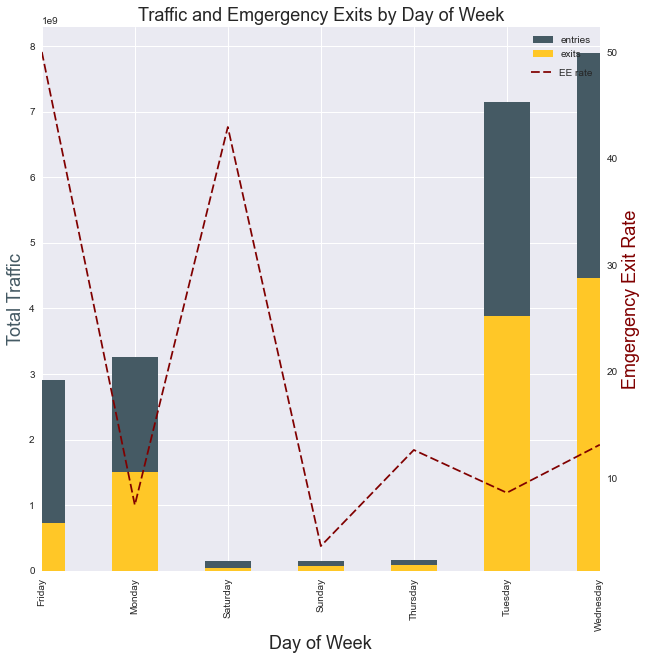

In [159]:
#Plot the Emgergency exits with the EXITS and ENTRIES for each day of the week 
from matplotlib.ticker import FuncFormatter

fig, ax1 = plt.subplots(figsize=(10,10))

ax2 = ax1.twinx()
p1 = weekday_ave['Congestion'].plot(kind='bar', color='#455A64', ax=ax1, label = 'entries')
p1.legend(loc = 1)
p2 = weekday_ave['EXITS_NUM'].plot(kind='bar', color='#FFC727', ax=ax1, label = 'exits')
p2.legend(loc = 1)
p3 = weekday_ave['Emgergency'].plot(kind='line', dashes = [5, 2], color='maroon', ax=ax2, label = 'EE rate')
p3.legend(loc = (0.87, 0.9)) 

plt.xticks((0,1,2,3,4,5,6),(weekday_ave['WEEKDAY']), rotation='horizontal')

ax1.set_xlabel('Day of Week', size = 18)
ax1.set_ylabel('Total Traffic', color='#455A64', size = 18)

ax2.set_ylabel('Emgergency Exit Rate', color='maroon', size = 18)
ax2.grid(False)
plt.title('Traffic and Emgergency Exits by Day of Week', size = 18) 
plt.show()

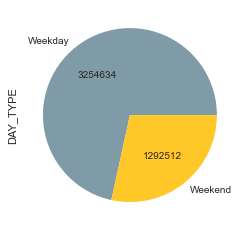

In [142]:
#plot pie chart of day type column
DAY_TYPE = turnstiles_df['DAY_TYPE'].value_counts()
colors = ['#809BA8','#FFC727']
DAY_TYPE.plot.pie(autopct=lambda x: '{:.0f}'.format(x*DAY_TYPE.sum()/100), colors = colors )